## Crypto Arbitrage

In this Challenge, you'll take on the role of an analyst at a high-tech investment firm. The vice president (VP) of your department is considering arbitrage opportunities in Bitcoin and other cryptocurrencies. As Bitcoin trades on markets across the globe, can you capitalize on simultaneous price dislocations in those markets by using the powers of Pandas?

For this assignment, you’ll sort through historical trade data for Bitcoin on two exchanges: Bitstamp and Coinbase. Your task is to apply the three phases of financial analysis to determine if any arbitrage opportunities exist for Bitcoin.

This aspect of the Challenge will consist of 3 phases.

1. Collect the data.

2. Prepare the data.

3. Analyze the data. 



###  Import the required libraries and dependencies.

In [1]:
import pandas as pd
from pathlib import Path
%matplotlib inline

## Collect the Data

To collect the data that you’ll need, complete the following steps:

Instructions. 

1. Using the Pandas `read_csv` function and the `Path` module, import the data from `bitstamp.csv` file, and create a DataFrame called `bitstamp`. Set the DatetimeIndex as the Timestamp column, and be sure to parse and format the dates.

2. Use the `head` (and/or the `tail`) function to confirm that Pandas properly imported the data.

3. Repeat Steps 1 and 2 for `coinbase.csv` file.

### Step 1: Using the Pandas `read_csv` function and the `Path` module, import the data from `bitstamp.csv` file, and create a DataFrame called `bitstamp`. Set the DatetimeIndex as the Timestamp column, and be sure to parse and format the dates.

In [2]:
# Read in the CSV file called "bitstamp.csv" using the Path module. 
# The CSV file is located in the Resources folder.
# Set the index to the column "Date"
# Set the parse_dates and infer_datetime_format parameters
bitstamp = pd.read_csv(
    Path('./Resources/bitstamp.csv'),
    index_col = "Timestamp",
    parse_dates = True,
    infer_datetime_format = True
)


### Step 2: Use the `head` (and/or the `tail`) function to confirm that Pandas properly imported the data.

In [3]:
# Use the head (and/or tail) function to confirm that the data was imported properly.
bitstamp.head()


,Open,High,Low,Close,BTC Volume,USD Volume,Weighted Price
Timestamp,,,,,,,
2018-01-01 00:00:00,13681.04,13681.04,13637.93,$13646.48,3.334553,45482.128785,13639.647479
2018-01-01 00:01:00,13646.48,13658.75,13610.18,$13658.75,2.663188,36361.390888,13653.332816
2018-01-01 00:02:00,13616.93,13616.93,13610.06,$13610.22,0.084653,1152.144036,13610.136247
2018-01-01 00:03:00,13610.27,13639.09,13610.27,$13639.09,7.182986,97856.416478,13623.361128
2018-01-01 00:04:00,13635.35,13636.35,13620.00,$13620.0,1.069665,14582.660932,13632.923329


### Step 3: Repeat Steps 1 and 2 for `coinbase.csv` file.

In [4]:
# Read in the CSV file called "coinbase.csv" using the Path module. 
# The CSV file is located in the Resources folder.
# Set the index to the column "Timestamp"
# Set the parse_dates and infer_datetime_format parameters
coinbase = pd.read_csv(
    Path('./Resources/coinbase.csv'),
    index_col = "Timestamp",
    parse_dates = True,
    infer_datetime_format = True
)


In [5]:
# Use the head (and/or tail) function to confirm that the data was imported properly.
coinbase.head()

,Open,High,Low,Close,BTC Volume,USD Volume,Weighted Price
Timestamp,,,,,,,
2018-01-01 00:00:00,13620.00,13620.00,13608.49,$13608.49,20.812754,283451.08537,13619.105106
2018-01-01 00:01:00,13607.14,13607.14,13601.66,$13601.66,13.474359,183283.97801,13602.426919
2018-01-01 00:02:00,13601.44,13601.44,13580.00,$13580.0,11.536360,156789.19686,13590.872506
2018-01-01 00:03:00,13587.31,13587.31,13542.70,$13550.34,16.328039,221413.64182,13560.332806
2018-01-01 00:04:00,13550.34,13585.95,13550.34,$13583.44,9.955364,135141.26944,13574.719401


## Prepare the Data

To prepare and clean your data for analysis, complete the following steps:

1. For the bitstamp DataFrame, replace or drop all `NaN`, or missing, values in the DataFrame.

2. Use the `str.replace` function to remove the dollar signs ($) from the values in the Close column.

3. Convert the data type of the Close column to a `float`.

4. Review the data for duplicated values, and drop them if necessary.

5. Repeat Steps 1–4 for the coinbase DataFrame.

### Step 1: For the bitstamp DataFrame, replace or drop all `NaN`, or missing, values in the DataFrame.

In [6]:
# For the bitstamp DataFrame, replace or drop all NaNs or missing values in the DataFrame
bitstamp = bitstamp.dropna()

# Confirm that no NaN values are present in DataFrame
bitstamp.isnull().sum()


Open              0
High              0
Low               0
Close             0
BTC Volume        0
USD Volume        0
Weighted Price    0
dtype: int64

### Step 2: Use the `str.replace` function to remove the dollar signs ($) from the values in the Close column.

In [7]:
# Use the str.replace function to remove the dollar sign, $
bitstamp.loc[:, 'Close'] = bitstamp.loc[:, 'Close'].str.replace("$", "")

# Confirm dollar sign is removed from "Close" column in DataFrame
bitstamp.head()

/opt/anaconda3/envs/dev/lib/python3.7/site-packages/ipykernel_launcher.py:2: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will*not* be treated as literal strings when regex=True.
  


,Open,High,Low,Close,BTC Volume,USD Volume,Weighted Price
Timestamp,,,,,,,
2018-01-01 00:00:00,13681.04,13681.04,13637.93,13646.48,3.334553,45482.128785,13639.647479
2018-01-01 00:01:00,13646.48,13658.75,13610.18,13658.75,2.663188,36361.390888,13653.332816
2018-01-01 00:02:00,13616.93,13616.93,13610.06,13610.22,0.084653,1152.144036,13610.136247
2018-01-01 00:03:00,13610.27,13639.09,13610.27,13639.09,7.182986,97856.416478,13623.361128
2018-01-01 00:04:00,13635.35,13636.35,13620.00,13620.0,1.069665,14582.660932,13632.923329


### Step 3: Convert the data type of the Close column to a `float`.

In [8]:
# Convert the Close data type to a float
bitstamp.loc[:, 'Close'] = bitstamp.loc[:, 'Close'].astype("float")

# Confirm data type is changed by calling dtypes function
bitstamp.dtypes


Open              float64
High              float64
Low               float64
Close             float64
BTC Volume        float64
USD Volume        float64
Weighted Price    float64
dtype: object

### Step 4: Review the data for duplicated values, and drop them if necessary.

In [9]:
# Review the data for duplicate values, and drop them if necessary
bitstamp.duplicated().sum()

# There are no duplicated values so using the drop_duplicates() function is not necessary

0

### Step 5: Repeat Steps 1–4 for the coinbase DataFrame.

In [10]:
# Repeat Steps 1–4 for the coinbase DataFrame

In [11]:
# For the coinbase DataFrame, replace or drop all NaNs or missing values in the DataFrame
coinbase = coinbase.dropna()

# Confirm that no NaN values are present in DataFrame
coinbase.isnull().sum()


Open              0
High              0
Low               0
Close             0
BTC Volume        0
USD Volume        0
Weighted Price    0
dtype: int64

In [12]:
# Use the str.replace function to remove the dollar sign, $
coinbase.loc[:, 'Close'] = coinbase.loc[:, 'Close'].str.replace("$", "")

# Confirm dollar sign is removed from "Close" column in DataFrame
coinbase.head()


/opt/anaconda3/envs/dev/lib/python3.7/site-packages/ipykernel_launcher.py:2: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will*not* be treated as literal strings when regex=True.
  


,Open,High,Low,Close,BTC Volume,USD Volume,Weighted Price
Timestamp,,,,,,,
2018-01-01 00:00:00,13620.00,13620.00,13608.49,13608.49,20.812754,283451.08537,13619.105106
2018-01-01 00:01:00,13607.14,13607.14,13601.66,13601.66,13.474359,183283.97801,13602.426919
2018-01-01 00:02:00,13601.44,13601.44,13580.00,13580.0,11.536360,156789.19686,13590.872506
2018-01-01 00:03:00,13587.31,13587.31,13542.70,13550.34,16.328039,221413.64182,13560.332806
2018-01-01 00:04:00,13550.34,13585.95,13550.34,13583.44,9.955364,135141.26944,13574.719401


In [13]:
# Convert the Close data type to a float
coinbase.loc[:, 'Close'] = coinbase.loc[:, 'Close'].astype("float")

# Confirm data type is changed by calling dtypes function
coinbase.dtypes


Open              float64
High              float64
Low               float64
Close             float64
BTC Volume        float64
USD Volume        float64
Weighted Price    float64
dtype: object

In [14]:
# Review the data for duplicate values, and drop them if necessary
bitstamp.duplicated().sum()

# There are no duplicated values so using the drop_duplicates() function is not necessary

0

## Analyze the Data

Your analysis consists of the following tasks: 

1. Choose the columns of data on which to focus your analysis.

2. Get the summary statistics and plot the data.

3. Focus your analysis on specific dates.

4. Calculate the arbitrage profits.

### Step 1: Choose columns of data on which to focus your analysis.

Select the data you want to analyze. Use `loc` or `iloc` to select the following columns of data for both the bitstamp and coinbase DataFrames:

* Timestamp (index)

* Close


In [15]:
# Use loc or iloc to select `Timestamp (the index)` and `Close` from bitstamp DataFrame
bitstamp_sliced = bitstamp.loc[:, 'Close']

# Review the first five rows of the DataFrame
bitstamp_sliced.head()

Timestamp
2018-01-01 00:00:00    13646.48
2018-01-01 00:01:00    13658.75
2018-01-01 00:02:00    13610.22
2018-01-01 00:03:00    13639.09
2018-01-01 00:04:00    13620.00
Name: Close, dtype: float64

In [16]:
# Use loc or iloc to select `Timestamp (the index)` and `Close` from coinbase DataFrame
coinbase_sliced = coinbase.loc[:, 'Close']

# Review the first five rows of the DataFrame
coinbase_sliced.head()

Timestamp
2018-01-01 00:00:00    13608.49
2018-01-01 00:01:00    13601.66
2018-01-01 00:02:00    13580.00
2018-01-01 00:03:00    13550.34
2018-01-01 00:04:00    13583.44
Name: Close, dtype: float64

### Step 2: Get summary statistics and plot the data.

Sort through the time series data associated with the bitstamp and coinbase DataFrames to identify potential arbitrage opportunities. To do so, complete the following steps:

1. Generate the summary statistics for each DataFrame by using the `describe` function.

2. For each DataFrame, create a line plot for the full period of time in the dataset. Be sure to tailor the figure size, title, and color to each visualization.

3. In one plot, overlay the visualizations that you created in Step 2 for bitstamp and coinbase. Be sure to adjust the legend and title for this new visualization.

4. Using the `loc` and `plot` functions, plot the price action of the assets on each exchange for different dates and times. Your goal is to evaluate how the spread between the two exchanges changed across the time period that the datasets define. Did the degree of spread change as time progressed?

In [17]:
# Generate the summary statistics for the bitstamp DataFrame
bitstamp_sliced.describe()


count    129067.000000
mean      10459.842453
std        2315.976088
min        5944.000000
25%        8613.370000
50%       10145.950000
75%       11444.810000
max       17234.980000
Name: Close, dtype: float64

In [18]:
# Generate the summary statistics for the coinbase DataFrame
coinbase_sliced.describe()


count    129322.000000
mean      10449.140958
std        2317.197419
min        5882.310000
25%        8609.230000
50%       10137.440000
75%       11397.237500
max       17177.990000
Name: Close, dtype: float64

<AxesSubplot:title={'center':'Bitstamp Prices'}, xlabel='Timestamp', ylabel='Closing Price ($)'>

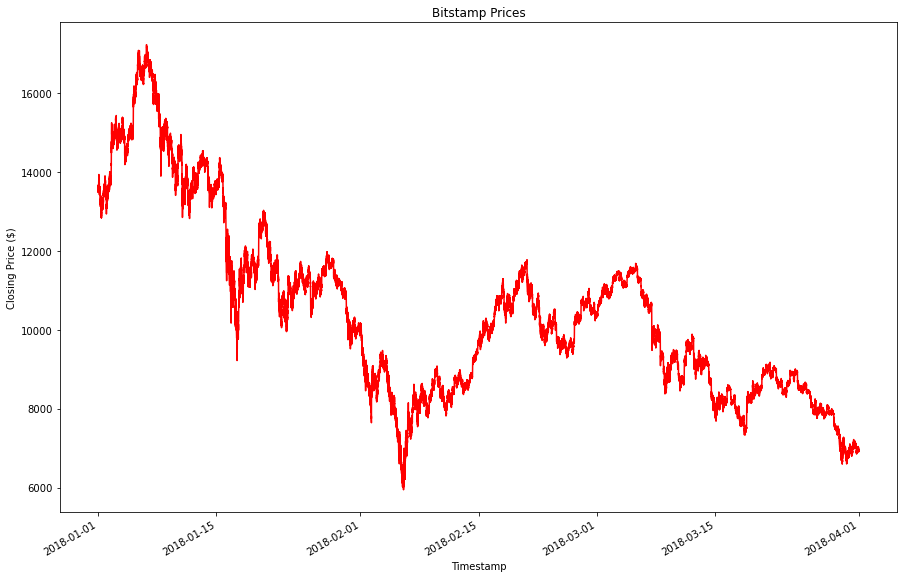

In [19]:
# Create a line plot for the bitstamp DataFrame for the full length of time in the dataset 
# Be sure that the figure size, title, and color are tailored to each visualization
bitstamp_sliced.plot(
    figsize = (15,10),
    title = "Bitstamp Prices",
    color = "red",
    ylabel = "Closing Price ($)"
)


<AxesSubplot:title={'center':'Coinbase Prices'}, xlabel='Timestamp', ylabel='Closing Price ($)'>

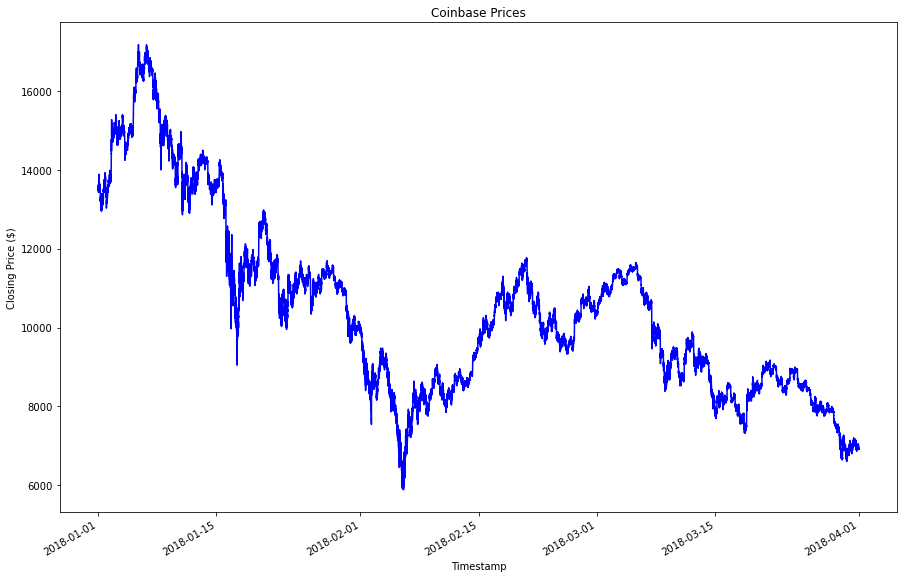

In [20]:
# Create a line plot for the coinbase DataFrame for the full length of time in the dataset 
# Be sure that the figure size, title, and color are tailored to each visualization
coinbase_sliced.plot(
    figsize = (15,10),
    title = "Coinbase Prices",
    color = "blue",
    ylabel = "Closing Price ($)"
)


<AxesSubplot:title={'center':'Bitstamp vs Coinbase Prices'}, xlabel='Timestamp', ylabel='Closing Price ($)'>

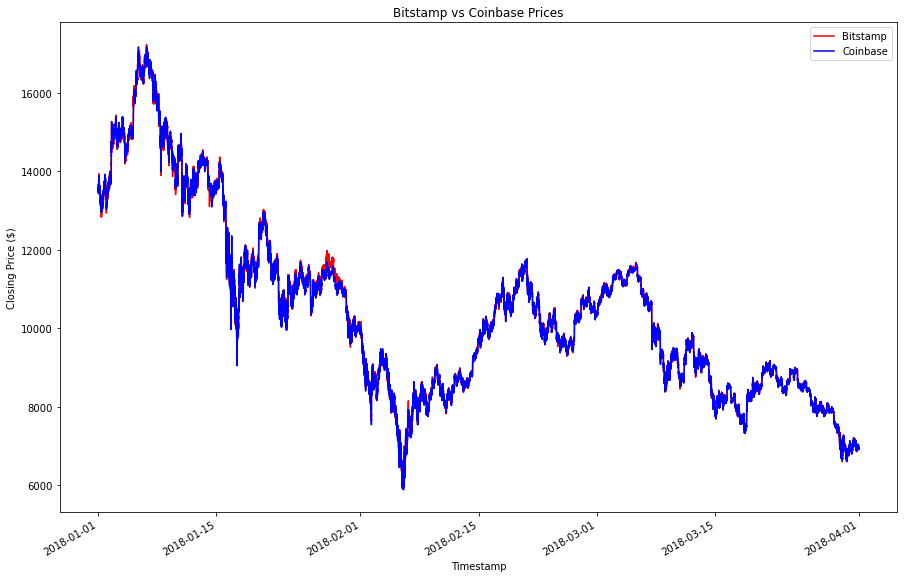

In [21]:
# Overlay the visualizations for the bitstamp and coinbase DataFrames in one plot
# The plot should visualize the prices over the full lenth of the dataset
# Be sure to include the parameters: legend, figure size, title, and color and label
bitstamp_sliced.plot(
    legend = True,
    label = "Bitstamp",
    figsize = (15,10),
    title = "Bitstamp vs Coinbase Prices",
    color = "red",
    ylabel = "Closing Price ($)"
)

coinbase_sliced.plot(
    legend = True,
    label = "Coinbase",
    figsize = (15,10),
    color = "blue",
)


<AxesSubplot:title={'center':'Bitstamp vs Coinbase Prices: January 2018'}, xlabel='Timestamp', ylabel='Closing Price ($)'>

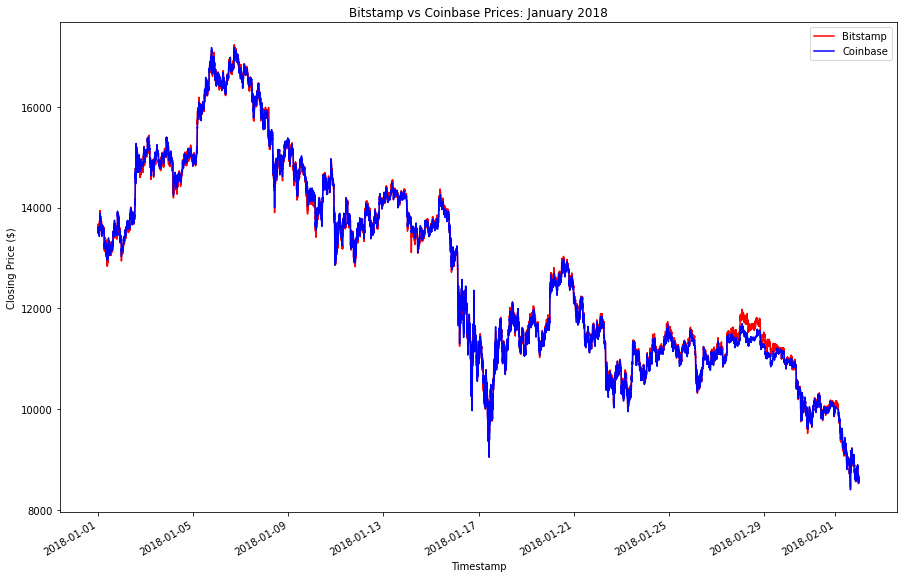

In [22]:
# Using the loc and plot functions, create an overlay plot that visualizes 
# the price action of both DataFrames for a one month period early in the dataset
# Be sure to include the parameters: legend, figure size, title, and color and label
bitstamp_sliced.loc['2018-01-01':'2018-02-01'].plot(
    legend = True,
    label = "Bitstamp",
    figsize = (15,10),
    title = "Bitstamp vs Coinbase Prices: January 2018",
    color = "red",
    ylabel = "Closing Price ($)"
)

coinbase_sliced.loc['2018-01-01':'2018-02-01'].plot(
    legend = True,
    label = "Coinbase",
    figsize = (15,10),
    color = "blue",
)


<AxesSubplot:title={'center':'Bitstamp vs Coinbase Prices: March 2018'}, xlabel='Timestamp', ylabel='Closing Price ($)'>

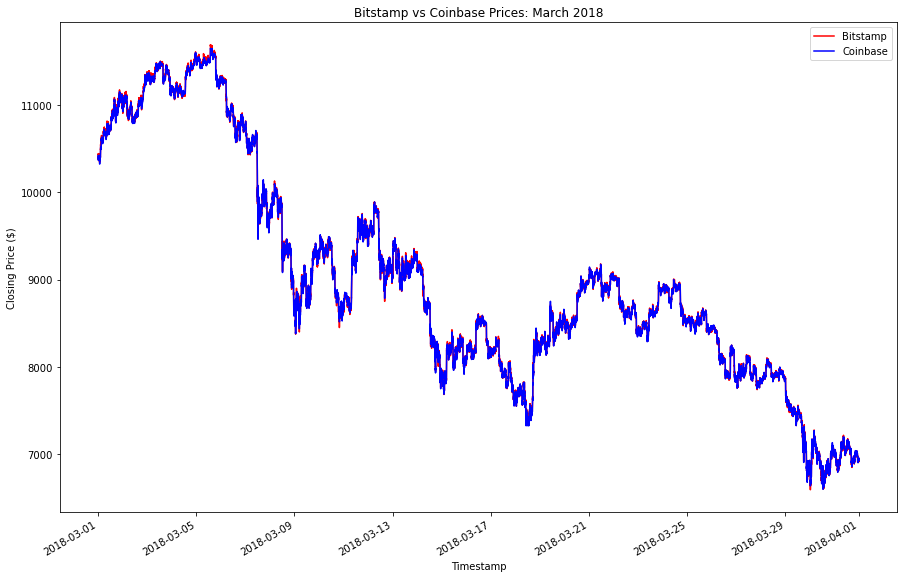

In [23]:
# Using the loc and plot functions, create an overlay plot that visualizes 
# the price action of both DataFrames for a one month period later in the dataset
# Be sure to include the parameters: legend, figure size, title, and color and label 
bitstamp_sliced.loc['2018-03-01':'2018-04-01'].plot(
    legend = True,
    label = "Bitstamp",
    figsize = (15,10),
    title = "Bitstamp vs Coinbase Prices: March 2018",
    color = "red",
    ylabel = "Closing Price ($)"
)

coinbase_sliced.loc['2018-03-01':'2018-04-01'].plot(
    legend = True,
    label = "Coinbase",
    figsize = (15,10),
    color = "blue",
)


**Question** Based on the visualizations of the different time periods, has the degree of spread changed as time progressed?

**Answer** It seems as though the degree of spread decreased as time progressed in early 2018. The graph comparing January prices shows a wider spread between the two exchanges than in March (more color divergence). The greatest opportunity for arbitrage profits was between January 28-30th, 2018. The graph comparing March prices shows a narrower spread between the exchanges than in January (less color divergence). This phenomenon could be the result of what I call "arbitrage exhaustion." This happens when a large number of traders enter the market to take advantage of arbitrage opportunities and consequently drive the prices closer together until the spread is essentially gone.

### Step 3: Focus Your Analysis on Specific Dates

Focus your analysis on specific dates by completing the following steps:

1. Select three dates to evaluate for arbitrage profitability. Choose one date that’s early in the dataset, one from the middle of the dataset, and one from the later part of the time period.

2. For each of the three dates, generate the summary statistics and then create a box plot. This big-picture view is meant to help you gain a better understanding of the data before you perform your arbitrage calculations. As you compare the data, what conclusions can you draw?

<AxesSubplot:title={'center':'Bitstamp vs Coinbase Prices: January 28th, 2018'}, xlabel='Timestamp', ylabel='Closing Price ($)'>

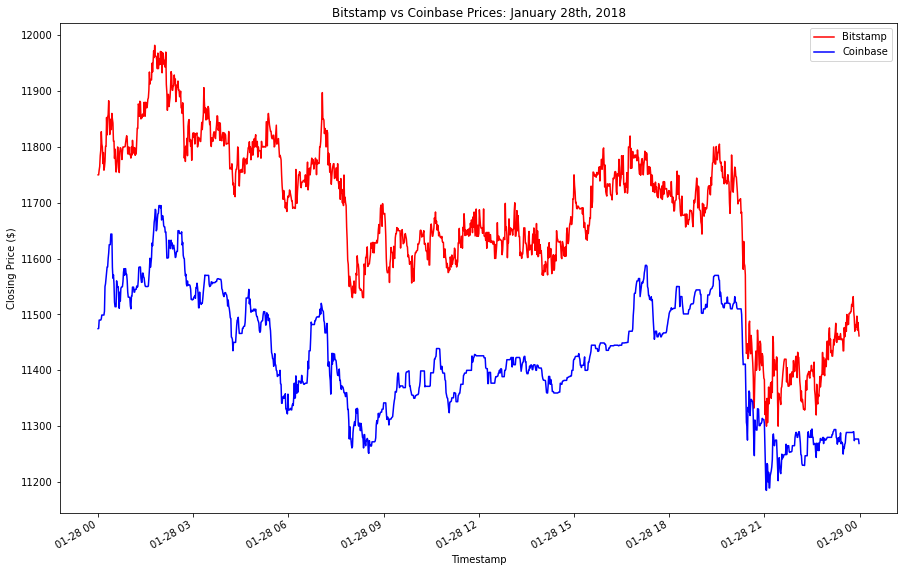

In [24]:
# Create an overlay plot that visualizes the two dataframes over a period of one day early in the dataset. 
# Be sure that the plots include the parameters `legend`, `figsize`, `title`, `color` and `label` 
bitstamp_sliced.loc['2018-01-28'].plot(
    legend = True,
    label = "Bitstamp",
    figsize = (15,10),
    title = "Bitstamp vs Coinbase Prices: January 28th, 2018",
    color = "red",
    ylabel = "Closing Price ($)"
)

coinbase_sliced.loc['2018-01-28'].plot(
    legend = True,
    label = "Coinbase",
    figsize = (15,10),
    color = "blue",
)


In [25]:
# Using the early date that you have selected, calculate the arbitrage spread 
# by subtracting the coinbase lower closing prices from the bitstamp higher closing prices
arbitrage_spread_early = bitstamp_sliced.loc['2018-01-28'] - coinbase_sliced.loc['2018-01-28']

# Generate summary statistics for the early DataFrame
arbitrage_spread_early.describe()


count    1436.000000
mean      247.552326
std        68.343472
min        55.030000
25%       210.022500
50%       251.180000
75%       290.925000
max       439.010000
Name: Close, dtype: float64

<AxesSubplot:title={'center':'Arbitrage Spread: January 28th, 2018'}>

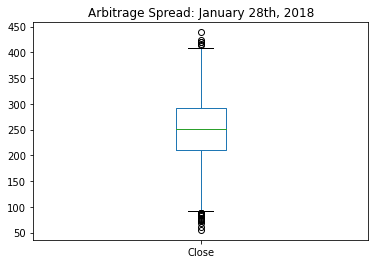

In [26]:
# Visualize the arbitrage spread from early in the dataset in a box plot
arbitrage_spread_early.plot(
    kind = "box", 
    title = "Arbitrage Spread: January 28th, 2018"
)


<AxesSubplot:title={'center':'Bitstamp vs Coinbase Prices: February 6th, 2018'}, xlabel='Timestamp', ylabel='Closing Price ($)'>

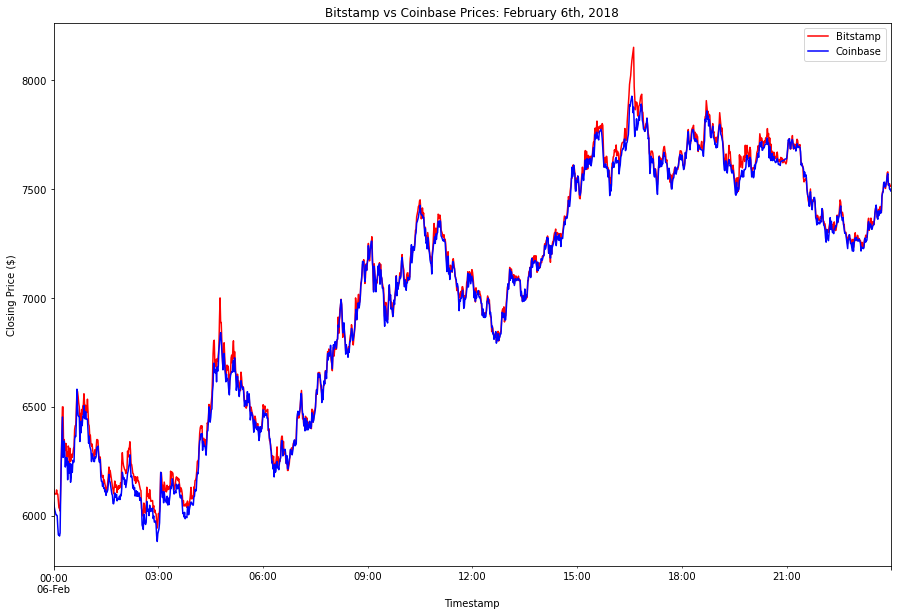

In [27]:
# Create an overlay plot that visualizes the two dataframes over a period of one day from the middle of the dataset. 
# Be sure that the plots include the parameters `legend`, `figsize`, `title`, `color` and `label` 
bitstamp_sliced.loc['2018-02-06'].plot(
    legend = True,
    label = "Bitstamp",
    figsize = (15,10),
    title = "Bitstamp vs Coinbase Prices: February 6th, 2018",
    color = "red",
    ylabel = "Closing Price ($)"
)

coinbase_sliced.loc['2018-02-06'].plot(
    legend = True,
    label = "Coinbase",
    figsize = (15,10),
    color = "blue",
)


In [28]:
# Using the date in the middle that you have selected, calculate the arbitrage spread 
# by subtracting the coinbase lower closing prices from the bitstamp higher closing prices
arbitrage_spread_middle = bitstamp_sliced.loc['2018-02-06'] - coinbase_sliced.loc['2018-02-06']

# Generate summary statistics 
arbitrage_spread_middle.describe()


count    1440.000000
mean       23.841236
std        30.390321
min       -51.000000
25%         4.675000
50%        19.375000
75%        37.877500
max       280.010000
Name: Close, dtype: float64

<AxesSubplot:title={'center':'Arbitrage Spread: February 6th, 2018'}>

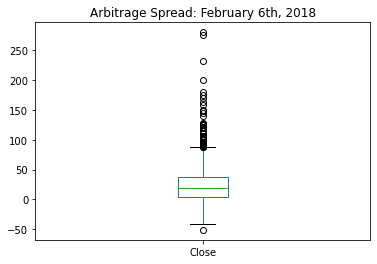

In [29]:
# Visualize the arbitrage spread from the middle of the dataset in a box plot
arbitrage_spread_middle.plot(
    kind = "box", 
    title = "Arbitrage Spread: February 6th, 2018"
)


<AxesSubplot:title={'center':'Bitstamp vs Coinbase Prices: March 16th, 2018'}, xlabel='Timestamp', ylabel='Closing Price ($)'>

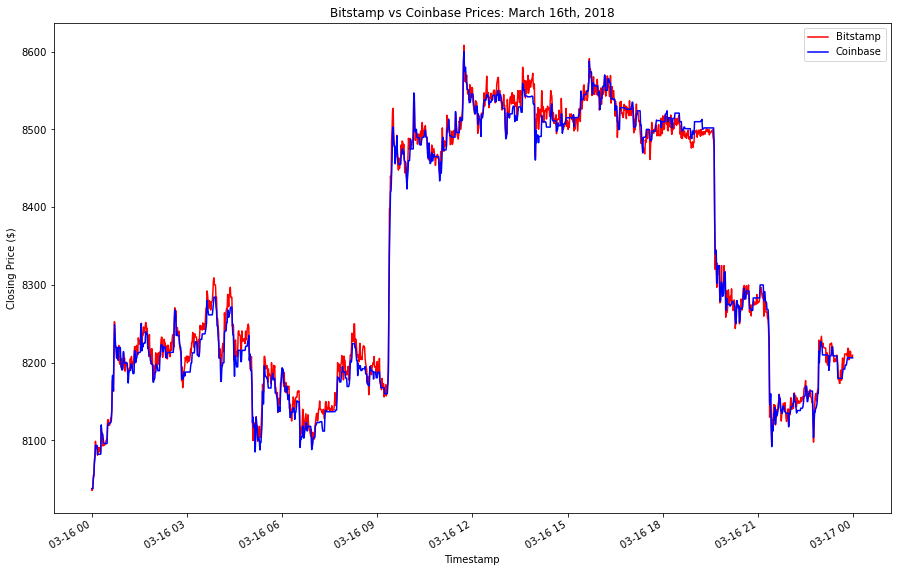

In [30]:
# Create an overlay plot that visualizes the two dataframes over a period of one day from late in the dataset. 
# Be sure that the plots include the parameters `legend`, `figsize`, `title`, `color` and `label` 
bitstamp_sliced.loc['2018-03-16'].plot(
    legend = True,
    label = "Bitstamp",
    figsize = (15,10),
    title = "Bitstamp vs Coinbase Prices: March 16th, 2018",
    color = "red",
    ylabel = "Closing Price ($)"
)

coinbase_sliced.loc['2018-03-16'].plot(
    legend = True,
    label = "Coinbase",
    figsize = (15,10),
    color = "blue",
)


In [31]:
# Using the date from the late that you have selected, calculate the arbitrage spread 
# by subtracting the bitstamp lower closing prices from the coinbase higher closing prices
arbitrage_spread_late = bitstamp_sliced.loc['2018-03-16'] - coinbase_sliced.loc['2018-03-16']

# Generate summary statistics 
arbitrage_spread_late.describe()


count    1436.000000
mean        4.529143
std        11.066311
min       -29.930000
25%        -3.020000
50%         4.020000
75%        12.275000
max        53.570000
Name: Close, dtype: float64

<AxesSubplot:title={'center':'Arbitrage Spread: March 16th, 2018'}>

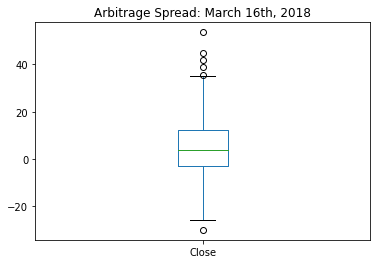

In [32]:
# Visualize the arbitrage spread from late in the dataset in a box plot
arbitrage_spread_late.plot(
    kind = "box", 
    title = "Arbitrage Spread: March 16th, 2018"
)


### Step 4: Calculate the Arbitrage Profits

Calculate the potential profits for each date that you selected in the previous section. Your goal is to determine whether arbitrage opportunities still exist in the Bitcoin market. Complete the following steps:

1. For each of the three dates, measure the arbitrage spread between the two exchanges by subtracting the lower-priced exchange from the higher-priced one. Then use a conditional statement to generate the summary statistics for each arbitrage_spread DataFrame, where the spread is greater than zero.

2. For each of the three dates, calculate the spread returns. To do so, divide the instances that have a positive arbitrage spread (that is, a spread greater than zero) by the price of Bitcoin from the exchange you’re buying on (that is, the lower-priced exchange). Review the resulting DataFrame.

3. For each of the three dates, narrow down your trading opportunities even further. To do so, determine the number of times your trades with positive returns exceed the 1% minimum threshold that you need to cover your costs.

4. Generate the summary statistics of your spread returns that are greater than 1%. How do the average returns compare among the three dates?

5. For each of the three dates, calculate the potential profit, in dollars, per trade. To do so, multiply the spread returns that were greater than 1% by the cost of what was purchased. Make sure to drop any missing values from the resulting DataFrame.

6. Generate the summary statistics, and plot the results for each of the three DataFrames.

7. Calculate the potential arbitrage profits that you can make on each day. To do so, sum the elements in the profit_per_trade DataFrame.

8. Using the `cumsum` function, plot the cumulative sum of each of the three DataFrames. Can you identify any patterns or trends in the profits across the three time periods?

(NOTE: The starter code displays only one date. You'll want to do this analysis for two additional dates).

#### 1. For each of the three dates, measure the arbitrage spread between the two exchanges by subtracting the lower-priced exchange from the higher-priced one. Then use a conditional statement to generate the summary statistics for each arbitrage_spread DataFrame, where the spread is greater than zero.

*NOTE*: For illustration, only one of the three dates is shown in the starter code below.

### Early Date

In [33]:
# For the date early in the dataset, measure the arbitrage spread between the two exchanges
# by subtracting the lower-priced exchange from the higher-priced one
arbitrage_spread_early = bitstamp_sliced.loc['2018-01-28'] - coinbase_sliced.loc['2018-01-28']

# Use a conditional statement to keep days only when the spread is greater than zero
early_positive_filter = arbitrage_spread_early > 0.00

# Create a subset of the 'arbitrage_spread_early' DataFrame using the loc function
# in conjunction with the conditional statement to select only positive spreads
early_positive_spread = arbitrage_spread_early.loc[early_positive_filter]

# Generate the summary statistics for early_positive_spread DataFrame
early_positive_spread.describe()


count    1436.000000
mean      247.552326
std        68.343472
min        55.030000
25%       210.022500
50%       251.180000
75%       290.925000
max       439.010000
Name: Close, dtype: float64

### Middle Date

In [34]:
# For the middle date in the dataset, measure the arbitrage spread between the two exchanges
# by subtracting the lower-priced exchange from the higher-priced one
arbitrage_spread_middle = bitstamp_sliced.loc['2018-02-06'] - coinbase_sliced.loc['2018-02-06']

# Use a conditional statement to keep days only when the spread is greater than zero
middle_positive_filter = arbitrage_spread_middle > 0.00

# Create a subset of the 'arbitrage_spread_middle' DataFrame using the loc function
# in conjunction with the conditional statement to select only positive spreads
middle_positive_spread = arbitrage_spread_middle.loc[middle_positive_filter]

# Generate the summary statistics for middle_positive_spread DataFrame
middle_positive_spread.describe()


count    1177.000000
mean       31.294452
std        28.481383
min         0.010000
25%        13.000000
50%        24.530000
75%        42.540000
max       280.010000
Name: Close, dtype: float64

### Late Date

In [35]:
# For the date that's late in the dataset, measure the arbitrage spread between the two
# exchanges by subtracting the lower-priced exchange from the higher-priced one
arbitrage_spread_late = bitstamp_sliced.loc['2018-03-16'] - coinbase_sliced.loc['2018-03-16']

# Use a conditional statement to keep days only when the spread is greater than zero
late_positive_filter = arbitrage_spread_late > 0.00

# Create a subset of the 'arbitrage_spread_late' DataFrame using the loc function
# in conjunction with the conditional statement to select only positive spreads
late_positive_spread = arbitrage_spread_late.loc[late_positive_filter]

# Generate the summary statistics for late_positive_spread DataFrame
late_positive_spread.describe()


count    937.000000
mean      10.776884
std        7.705699
min        0.010000
25%        4.440000
50%        9.780000
75%       15.450000
max       53.570000
Name: Close, dtype: float64

#### 2. For each of the three dates, calculate the spread returns. To do so, divide the instances that have a positive arbitrage spread (that is, a spread greater than zero) by the price of Bitcoin from the exchange you’re buying on (that is, the lower-priced exchange). Review the resulting DataFrame.

### Early Date

In [36]:
# For the date early in the dataset, calculate the spread returns by dividing the instances when the arbitrage spread is positive (> 0) 
# by the price of Bitcoin from the exchange you are buying on (the lower-priced exchange).
spread_return_early = early_positive_spread / coinbase_sliced.loc['2018-01-28']

# Review the spread return DataFrame
spread_return_early


Timestamp
2018-01-28 00:00:00    0.023999
2018-01-28 00:01:00    0.023965
2018-01-28 00:02:00    0.023392
2018-01-28 00:03:00    0.023936
2018-01-28 00:04:00    0.025610
                         ...   
2018-01-28 23:55:00    0.019518
2018-01-28 23:56:00    0.017302
2018-01-28 23:57:00    0.018510
2018-01-28 23:58:00    0.017303
2018-01-28 23:59:00    0.017094
Name: Close, Length: 1440, dtype: float64

In [37]:
# Review summary data of early spread returns
spread_return_early.describe()


count    1436.000000
mean        0.021648
std         0.005961
min         0.004885
25%         0.018369
50%         0.021897
75%         0.025292
max         0.038510
Name: Close, dtype: float64

### Middle Date

In [38]:
# For the middle date in the dataset, calculate the spread returns by dividing the instances when the arbitrage spread is positive (> 0) 
# by the price of Bitcoin from the exchange you are buying on (the lower-priced exchange).
spread_return_middle = middle_positive_spread / coinbase_sliced.loc['2018-02-06']

# Review the spread return DataFrame
spread_return_middle


Timestamp
2018-02-06 00:00:00    0.010084
2018-02-06 00:01:00    0.009950
2018-02-06 00:02:00    0.012606
2018-02-06 00:03:00    0.014129
2018-02-06 00:04:00    0.016004
                         ...   
2018-02-06 23:55:00         NaN
2018-02-06 23:56:00         NaN
2018-02-06 23:57:00    0.003271
2018-02-06 23:58:00    0.001536
2018-02-06 23:59:00    0.003157
Name: Close, Length: 1440, dtype: float64

In [39]:
# Review summary data of middle spread returns
spread_return_middle.describe()


count    1177.000000
mean        0.004590
std         0.004220
min         0.000001
25%         0.001851
50%         0.003384
75%         0.006041
max         0.036984
Name: Close, dtype: float64

### Late Date

In [40]:
# For the date that's late in the dataset, calculate the spread returns by dividing the instances when the arbitrage spread is 
# positive (> 0) by the price of Bitcoin from the exchange you are buying on (the lower-priced exchange).
spread_return_late = late_positive_spread / coinbase_sliced.loc['2018-03-16']

# Review the spread return DataFrame
spread_return_late


Timestamp
2018-03-16 00:00:00         NaN
2018-03-16 00:01:00         NaN
2018-03-16 00:02:00    0.000024
2018-03-16 00:03:00    0.000645
2018-03-16 00:04:00         NaN
                         ...   
2018-03-16 23:55:00    0.001014
2018-03-16 23:56:00    0.000076
2018-03-16 23:57:00    0.000076
2018-03-16 23:58:00    0.000090
2018-03-16 23:59:00    0.000400
Name: Close, Length: 1440, dtype: float64

In [41]:
# Review summary data of late spread returns
spread_return_late.describe()


count    937.000000
mean       0.001299
std        0.000926
min        0.000001
25%        0.000534
50%        0.001182
75%        0.001883
max        0.006420
Name: Close, dtype: float64

#### 3. For each of the three dates, narrow down your trading opportunities even further. To do so, determine the number of times your trades with positive returns exceed the 1% minimum threshold that you need to cover your costs.

### Early Date

In [46]:
# For the date early in the dataset, determine the number of times your trades with positive returns 
# exceed the 1% minimum threshold (.01) that you need to cover your costs
profitable_trades_early = spread_return_early[spread_return_early > 0.01]

# Check length of data to confirm non-qualifying values are removed
len(profitable_trades_early)


1378

In [48]:
# Review the first five profitable trades for early date
profitable_trades_early.head()


Timestamp
2018-01-28 00:00:00    0.023999
2018-01-28 00:01:00    0.023965
2018-01-28 00:02:00    0.023392
2018-01-28 00:03:00    0.023936
2018-01-28 00:04:00    0.025610
Name: Close, dtype: float64

### Middle Date

In [49]:
# For the middle date in the dataset, determine the number of times your trades with positive returns 
# exceed the 1% minimum threshold (.01) that you need to cover your costs
profitable_trades_middle = spread_return_middle[spread_return_middle > 0.01]

# Check length of data to confirm non-qualifying values are removed
len(profitable_trades_middle)


110

In [50]:
# Review the first five profitable trades for middle date
profitable_trades_middle.head()


Timestamp
2018-02-06 00:00:00    0.010084
2018-02-06 00:02:00    0.012606
2018-02-06 00:03:00    0.014129
2018-02-06 00:04:00    0.016004
2018-02-06 00:05:00    0.019154
Name: Close, dtype: float64

### Late Date

In [54]:
# For the date that's late in the dataset, determine the number of times your trades with positive returns 
# exceed the 1% minimum threshold (.01) that you need to cover your costs
profitable_trades_late = spread_return_late[spread_return_late > 0.01]

# Check length of data to confirm non-qualifying values are removed
len(profitable_trades_late)


0

In [55]:
# Review the first five profitable trades for late date
profitable_trades_late.head()


Series([], Name: Close, dtype: float64)

#### 4. Generate the summary statistics of your spread returns that are greater than 1%. How do the average returns compare among the three dates?

### Early Date

In [57]:
# For the date early in the dataset, generate the summary statistics for the profitable trades
# or you trades where the spread returns are are greater than 1%
profitable_trades_early.describe()


count    1378.000000
mean        0.022201
std         0.005421
min         0.010087
25%         0.019016
50%         0.022191
75%         0.025413
max         0.038510
Name: Close, dtype: float64

### Middle Date

In [58]:
# For the middle date in the dataset, generate the summary statistics for the profitable trades
# or you trades where the spread returns are are greater than 1%
profitable_trades_middle.describe()


count    110.000000
mean       0.014312
std        0.005292
min        0.010084
25%        0.010822
50%        0.012209
75%        0.015809
max        0.036984
Name: Close, dtype: float64

### Late Date

In [59]:
# For the date that's late in the dataset, generate the summary statistics for the profitable trades
# or you trades where the spread returns are are greater than 1%
profitable_trades_late.describe()


count    0.0
mean     NaN
std      NaN
min      NaN
25%      NaN
50%      NaN
75%      NaN
max      NaN
Name: Close, dtype: float64

#### 5. For each of the three dates, calculate the potential profit, in dollars, per trade. To do so, multiply the spread returns that were greater than 1% by the cost of what was purchased. Make sure to drop any missing values from the resulting DataFrame.

### Early Date

In [61]:
# For the date early in the dataset, calculate the potential profit per trade in dollars 
# Multiply the profitable trades by the cost of the Bitcoin that was purchased
profit_early = profitable_trades_early * coinbase_sliced.loc['2018-01-28']

# Drop any missing values from the profit DataFrame
profit_per_trade_early = profit_early.dropna()

# View the early profit DataFrame
profit_per_trade_early


Timestamp
2018-01-28 00:00:00    275.38
2018-01-28 00:01:00    275.00
2018-01-28 00:02:00    268.77
2018-01-28 00:03:00    275.03
2018-01-28 00:04:00    294.26
                        ...  
2018-01-28 23:55:00    220.10
2018-01-28 23:56:00    195.11
2018-01-28 23:57:00    208.74
2018-01-28 23:58:00    195.12
2018-01-28 23:59:00    192.63
Name: Close, Length: 1378, dtype: float64

### Middle Date

In [62]:
# For the middle date in the dataset, calculate the potential profit per trade in dollars 
# Multiply the profitable trades by the cost of the Bitcoin that was purchased
profit_middle = profitable_trades_middle * coinbase_sliced.loc['2018-02-06']

# Drop any missing values from the profit DataFrame
profit_per_trade_middle = profit_middle.dropna()

# View the middle profit DataFrame
profit_per_trade_middle


Timestamp
2018-02-06 00:00:00     61.12
2018-02-06 00:02:00     75.95
2018-02-06 00:03:00     84.99
2018-02-06 00:04:00     96.09
2018-02-06 00:05:00    115.00
                        ...  
2018-02-06 17:05:00     81.00
2018-02-06 19:39:00    119.18
2018-02-06 19:41:00     92.51
2018-02-06 19:46:00     94.79
2018-02-06 19:49:00    110.55
Name: Close, Length: 110, dtype: float64

### Late Date

In [63]:
# For the date that's late in the dataset, calculate the potential profit per trade in dollars 
# Multiply the profitable trades by the cost of the Bitcoin that was purchased
profit_late = profitable_trades_late * coinbase_sliced.loc['2018-03-16']

# Drop any missing values from the profit DataFrame
profit_per_trade_late = profit_late.dropna()

# View the late profit DataFrame
profit_per_trade_late


Series([], Name: Close, dtype: float64)

#### 6. Generate the summary statistics, and plot the results for each of the three DataFrames.

### Early Date

In [ ]:
# Generate the summary statistics for the early profit per trade DataFrame
# YOUR CODE HERE

In [ ]:
# Plot the results for the early profit per trade DataFrame
# YOUR CODE HERE

### Middle Date

In [ ]:
# Generate the summary statistics for the middle profit per trade DataFrame
# YOUR CODE HERE

In [ ]:
# Plot the results for the middle profit per trade DataFrame
# YOUR CODE HERE

### Late Date

In [ ]:
# Generate the summary statistics for the late profit per trade DataFrame
# YOUR CODE HERE

In [ ]:
# Plot the results for the late profit per trade DataFrame
# YOUR CODE HERE

#### 7. Calculate the potential arbitrage profits that you can make on each day. To do so, sum the elements in the profit_per_trade DataFrame.

### Early Date

In [ ]:
# Calculate the sum of the potential profits for the early profit per trade DataFrame
# YOUR CODE HERE

### Middle Date

In [ ]:
# Calculate the sum of the potential profits for the middle profit per trade DataFrame
# YOUR CODE HERE

### Late Date

In [ ]:
# Calculate the sum of the potential profits for the late profit per trade DataFrame
# YOUR CODE HERE

#### 8. Using the `cumsum` function, plot the cumulative sum of each of the three DataFrames. Can you identify any patterns or trends in the profits across the three time periods?

### Early Date

In [ ]:
# Use the cumsum function to calculate the cumulative profits over time for the early profit per trade DataFrame
cumulative_profit_early = # YOUR CODE HERE

In [ ]:
# Plot the cumulative sum of profits for the early profit per trade DataFrame
# YOUR CODE HERE

### Middle Date

In [ ]:
# Use the cumsum function to calculate the cumulative profits over time for the middle profit per trade DataFrame
cumulative_profit_early = # YOUR CODE HERE

In [ ]:
# Plot the cumulative sum of profits for the middle profit per trade DataFrame
# YOUR CODE HERE

### Late Date

In [ ]:
# Use the cumsum function to calculate the cumulative profits over time for the late profit per trade DataFrame
cumulative_profit_early = # YOUR CODE HERE

In [ ]:
# Plot the cumulative sum of profits for the late profit per trade DataFrame
# YOUR CODE HERE

**Question:** After reviewing the profit information across each date from the different time periods, can you identify any patterns or trends?
    
**Answer:** YOUR ANSWER HERE